In [18]:
import tensorflow as tf
import numpy as np

sess = tf.InteractiveSession()

# A scalar index of a vector is a scalar.
# 3 is the index of 4, so gathering 3 is 4.
x = np.array([[ 1,2,3], [4,5,6]]) #2, 3
y = np.transpose(x, [1,0])
print(x.shape, y.shape)
print(x, y)
# print(tf.where(x==1).eval())
print(tf.reshape(x, [-1, 1]).eval())
print(tf.reshape(y, [-1, 1]).eval())

((2, 3), (3, 2))
(array([[1, 2, 3],
       [4, 5, 6]]), array([[1, 4],
       [2, 5],
       [3, 6]]))
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [4]
 [2]
 [5]
 [3]
 [6]]


In [114]:

%load_ext autoreload
%autoreload 2

def read_in_results_log(path, line_identifier):
    with open(path) as f:
        content = f.readlines()
    print("Getting all lines beginning with \"{}\"".format(line_identifier))
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content if line_identifier in x ] 
    results = []
    for arr in content:
        arr = arr[len(line_identifier)+1:-1]
        arr = (np.fromstring(arr, dtype=float, sep=' '))
        results.append(arr)
    return results


def filter_y_given_x(xs, ys):
    "only return cases when test_acc>0.9"
    y_filtered = []
    xs = np.array(xs)
    ys = np.array(ys)
    for i, y in enumerate(ys):
        y_new = y[np.where(xs[i]>0.8)]
        y_filtered.append(y_new)
    return y_filtered

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (7,5)

colors = ["#610000","#DB6D00", "#24FF24"]
# another colormap I used before: matplotlib.cm.RdBu_r
def plot_x_vs_variance(xs, ys, colors=None, xlabel='', ylabel=''):
    """colors must be in range (0,1)"""
    for i, y in enumerate(ys):
        if colors != None:
            plt.scatter([xs[i] for j in range(len(y))], y, c=colors[i], cmap='cool', s=50, alpha=0.15)
        else:
            plt.scatter([xs[i] for j in range(len(y))], y, s=50, alpha=0.12)
    if colors != None:
        plt.colorbar()
    plt.plot(xs, [np.mean(y) for y in ys], linewidth=5, c="#DB6D00")
#     plt.gca().xaxis.grid(True)
    plt.tick_params(labelsize=15)
    plt.grid(True)
#     plt.axis([-0.05,1.05, 0.4, 1.05])

    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
decay_rates = np.linspace(0,1,10)
test_accs = [[1.000, 0.511, 0.502, 0.501, 0.518, 0.469, 0.502, 1.000, 0.515, 0.637, 0.628, 0.507
, 0.525, 0.517, 0.495, 1.000, 1.000, 0.711, 0.748, 0.468],
[0.868, 1.000, 0.808, 0.470, 0.504, 0.476, 0.875, 0.502, 1.000, 1.000, 0.785, 0.766
, 0.573, 0.540, 1.000, 0.508, 0.842, 0.472, 1.000, 0.486],
[0.512, 1.000, 0.935, 0.485, 0.911, 0.878, 0.488, 0.973, 0.488, 0.810, 0.508, 0.519
, 0.982, 0.498, 0.495, 0.612, 0.742, 0.507, 0.506, 0.998],
[0.508, 1.000, 0.979, 0.526, 0.535, 0.700, 1.000, 0.960, 1.000, 0.679, 0.494, 0.484
, 0.635, 0.529, 0.493, 0.493, 0.850, 0.508, 1.000, 0.507],
[0.918, 1.000, 0.581, 0.651, 0.521, 0.487, 0.941, 0.494, 1.000, 1.000, 0.831, 0.731
, 0.511, 0.499, 0.995, 0.707, 0.505, 1.000, 0.539, 0.510],
[0.877, 1.000, 0.686, 0.478, 0.499, 0.499, 0.922, 0.491, 1.000, 1.000, 0.791, 0.762
, 0.513, 0.502, 0.998, 0.620, 0.502, 1.000, 0.518, 0.535],
[0.895, 1.000, 0.690, 0.642, 0.505, 0.551, 0.958, 0.495, 1.000, 1.000, 0.525, 0.762
, 0.475, 0.535, 0.996, 0.779, 0.494, 1.000, 0.516, 0.526],
[0.891, 1.000, 0.595, 0.553, 0.496, 0.493, 0.942, 0.510, 1.000, 1.000, 0.710, 0.624
, 0.499, 0.502, 0.998, 0.688, 0.502, 1.000, 0.505, 0.544],
[0.912, 1.000, 0.587, 0.504, 0.568, 0.513, 0.964, 0.651, 1.000, 1.000, 0.975, 0.502
, 0.822, 0.543, 1.000, 0.724, 0.506, 1.000, 0.535, 0.547],
[0.893, 1.000, 0.622, 0.591, 0.507, 0.508, 0.946, 0.556, 1.000, 1.000, 0.843, 0.757
, 0.549, 0.795, 0.995, 0.728, 0.490, 1.000, 0.508, 0.509]]

final_entropies = [[3.420, 1.337, 3.494, 1.277, 5.411, 5.121, 4.446, 2.814, 5.335, 3.638, 3.399, 1.492
, 3.731, 3.359, 4.027, 3.115, 4.847, 3.894, 3.934, 3.237],
[4.438, 3.513, 3.660, 1.972, 3.344, 3.119, 3.088, 4.574, 2.939, 2.277, 4.235, 4.649
, 4.285, 2.217, 3.149, 5.153, 5.009, 3.843, 2.953, 2.927],
[5.781, 3.417, 4.129, 1.090, 3.816, 3.780, 3.510, 3.884, 5.211, 4.303, 5.448, 3.773
, 3.679, 2.093, 4.700, 3.713, 5.105, 5.237, 4.993, 2.959],
[5.707, 3.171, 4.189, 4.484, 5.061, 4.855, 3.151, 4.902, 3.939, 4.503, 4.627, 2.011
, 3.877, 1.829, 5.342, 2.349, 4.838, 4.589, 3.033, 3.722],
[4.051, 3.454, 3.850, 3.877, 3.147, 3.049, 2.835, 4.429, 3.110, 2.840, 4.422, 4.769
, 3.670, 2.056, 3.377, 4.549, 3.634, 2.990, 5.374, 2.631],
[4.248, 3.384, 3.497, 3.321, 2.950, 2.680, 2.768, 4.537, 3.203, 2.916, 4.464, 4.406
, 3.694, 1.560, 3.264, 4.732, 3.218, 2.800, 4.729, 3.489],
[4.039, 3.268, 3.482, 4.173, 3.297, 2.210, 2.621, 4.227, 3.137, 2.946, 5.230, 4.469
, 4.648, 2.909, 3.290, 4.264, 3.459, 2.751, 5.554, 1.878],
[3.523, 3.280, 3.931, 2.767, 2.334, 2.270, 2.670, 5.203, 3.107, 3.064, 4.210, 5.251
, 3.495, 4.639, 3.306, 4.583, 4.125, 2.952, 4.926, 3.062],
[3.533, 3.286, 4.059, 3.591, 3.515, 3.179, 2.534, 5.543, 3.116, 3.193, 4.053, 5.022
, 4.682, 4.669, 3.022, 4.221, 4.024, 3.002, 4.820, 3.264],
[3.574, 3.424, 3.964, 3.187, 0.889, 2.675, 2.516, 5.287, 3.135, 2.978, 4.649, 4.782
, 3.975, 4.428, 3.463, 4.233, 3.253, 3.209, 4.409, 3.644]]

final_att_loss = [[0.499, 0.100, 0.319, 0.193, 0.621, 0.583, 0.443, 0.454, 0.692, 0.472, 0.315, 0.092
, 0.489, 0.336, 0.531, 0.388, 0.638, 0.504, 0.517, 0.090],
[0.783, 0.511, 0.537, 0.366, 0.346, 0.324, 0.613, 0.571, 0.857, 0.422, 0.694, 0.741
, 0.672, 0.290, 0.584, 0.748, 0.803, 0.668, 0.584, 0.186],
[0.834, 0.595, 0.668, 0.155, 0.777, 0.745, 0.409, 0.761, 0.859, 0.752, 0.902, 0.678
, 0.679, 0.308, 0.814, 0.536, 0.777, 0.860, 0.876, 0.470],
[0.849, 0.614, 0.653, 0.627, 0.761, 0.771, 0.615, 0.807, 0.726, 0.887, 0.707, 0.119
, 0.430, 0.495, 0.901, 0.150, 0.777, 0.876, 0.669, 0.362],
[0.853, 0.650, 0.497, 0.562, 0.352, 0.321, 0.587, 0.610, 0.670, 0.691, 0.811, 0.853
, 0.704, 0.247, 0.845, 0.627, 0.534, 0.603, 0.851, 0.326],
[0.898, 0.635, 0.577, 0.516, 0.373, 0.414, 0.652, 0.658, 0.673, 0.702, 0.885, 0.864
, 0.682, 0.214, 0.830, 0.596, 0.557, 0.604, 0.731, 0.430],
[0.875, 0.650, 0.556, 0.600, 0.392, 0.372, 0.631, 0.618, 0.658, 0.700, 0.739, 0.872
, 0.799, 0.504, 0.832, 0.597, 0.547, 0.649, 0.849, 0.363],
[0.829, 0.635, 0.584, 0.463, 0.308, 0.368, 0.628, 0.789, 0.647, 0.686, 0.813, 0.860
, 0.709, 0.635, 0.835, 0.697, 0.661, 0.621, 0.821, 0.505],
[0.817, 0.625, 0.564, 0.573, 0.289, 0.426, 0.592, 0.873, 0.663, 0.689, 0.844, 0.767
, 0.753, 0.827, 0.745, 0.604, 0.687, 0.636, 0.690, 0.554],
[0.825, 0.640, 0.578, 0.455, 0.313, 0.476, 0.614, 0.819, 0.660, 0.694, 0.796, 0.918
, 0.756, 0.699, 0.843, 0.642, 0.586, 0.713, 0.740, 0.615]]


final_entropies_filtered = filter_y_given_x(test_accs, final_entropies)
final_att_loss_filtered = filter_y_given_x(test_accs, final_att_loss)

In [33]:
x = np.array(test_accs[0])
x[np.where(x>0.9)]

array([ 1.,  1.,  1.,  1.])

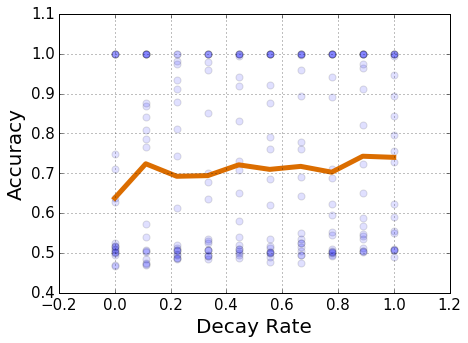

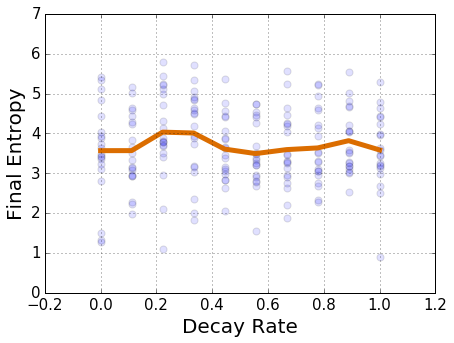

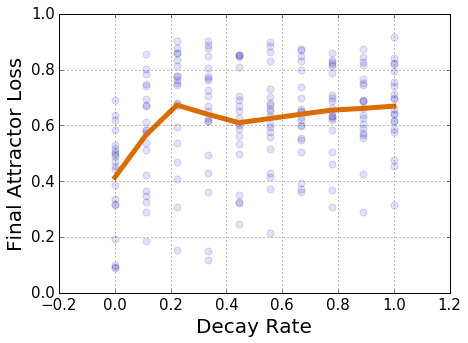

In [90]:

    
plot_x_vs_variance(decay_rates, test_accs, r"Decay Rate", r"Accuracy")
plot_x_vs_variance(decay_rates, final_entropies,  r"Decay Rate", r"Final Entropy")
# plot_x_vs_variance(decay_rates, final_entropies_filtered,  r"Decay Rate", r"Final Entropy (filtered)")

plot_x_vs_variance(decay_rates, final_att_loss,  r"Decay Rate", r"Final Attractor Loss")
# plot_x_vs_variance(decay_rates, final_att_loss_filtered,  r"Decay Rate", r"Final Attractor Loss (filtered)")

Getting all lines beginning with "TEST:"
Getting all lines beginning with "ENTROPY:"
Getting all lines beginning with "ATT_LOSS:"


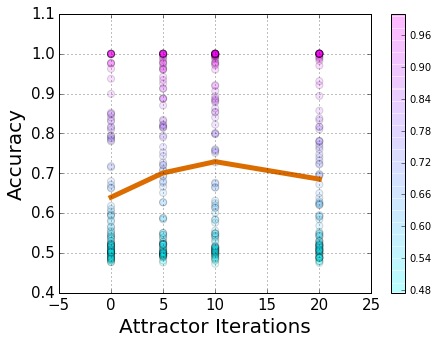

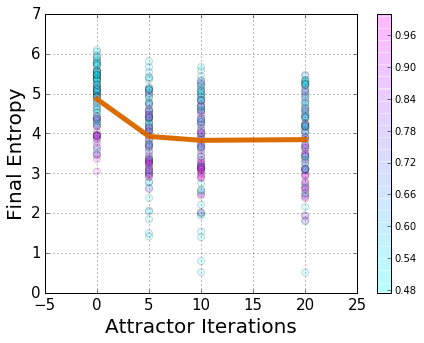

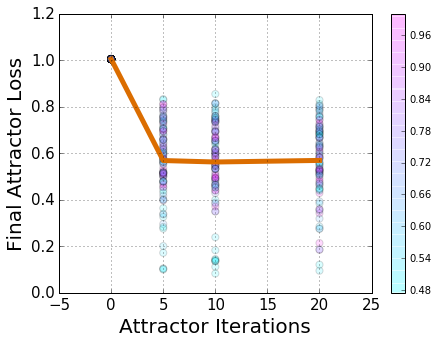

In [115]:
path = '/Users/denis/Dropbox/school/research/attractor_net_notebooks/experiments/results/parity_length(attractor_iterations_test).txt'
test_results = read_in_results_log(path, 'TEST:')
entropy_results = read_in_results_log(path, 'ENTROPY:')
att_loss_results = read_in_results_log(path, 'ATT_LOSS:')
n_attractor_iterations = [0, 5, 10, 20]

plot_x_vs_variance(n_attractor_iterations, test_results, test_results, xlabel=r"Attractor Iterations", ylabel=r"Accuracy")
plot_x_vs_variance(n_attractor_iterations, entropy_results, test_results, r"Attractor Iterations", r"Final Entropy")
plot_x_vs_variance(n_attractor_iterations, att_loss_results, test_results, r"Attractor Iterations", r"Final Attractor Loss")

Getting all lines beginning with "TEST:"
Getting all lines beginning with "ENTROPY:"
Getting all lines beginning with "ATT_LOSS:"


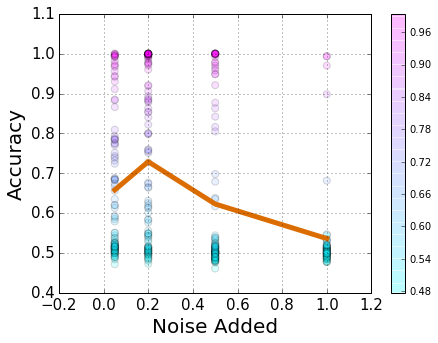

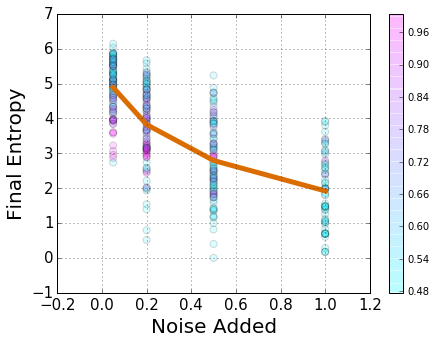

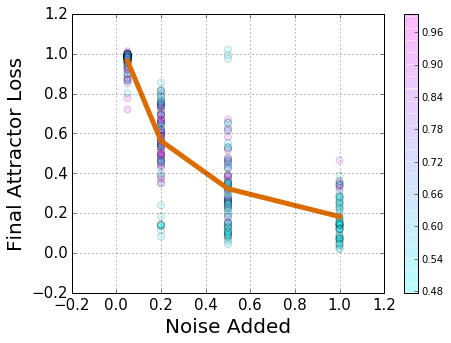

In [118]:
path = '/Users/denis/Dropbox/school/research/attractor_net_notebooks/experiments/results/parity_length(noise_added).txt'
test_results = read_in_results_log(path, 'TEST:')
entropy_results = read_in_results_log(path, 'ENTROPY:')
att_loss_results = read_in_results_log(path, 'ATT_LOSS:')
n_attractor_iterations = [0.05, 0.2, 0.5, 1.0]

plot_x_vs_variance(n_attractor_iterations, test_results, test_results, xlabel=r"Noise Added", ylabel=r"Accuracy")
plot_x_vs_variance(n_attractor_iterations, entropy_results, test_results, r"Noise Added", r"Final Entropy")
plot_x_vs_variance(n_attractor_iterations, att_loss_results, test_results, r"Noise Added", r"Final Attractor Loss")

Getting all lines beginning with "TEST:"
Getting all lines beginning with "ENTROPY:"
Getting all lines beginning with "ATT_LOSS:"


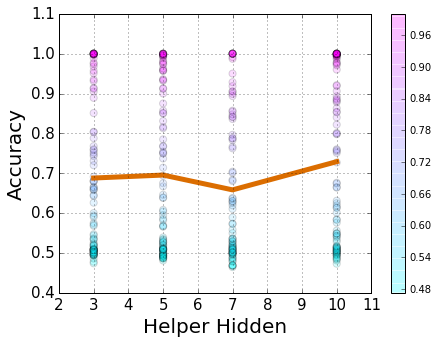

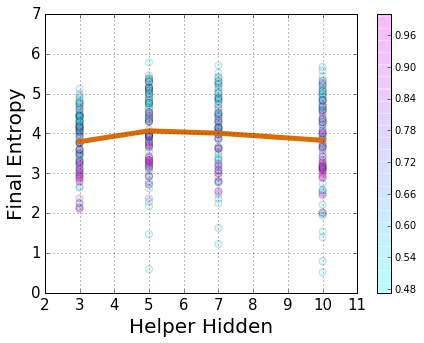

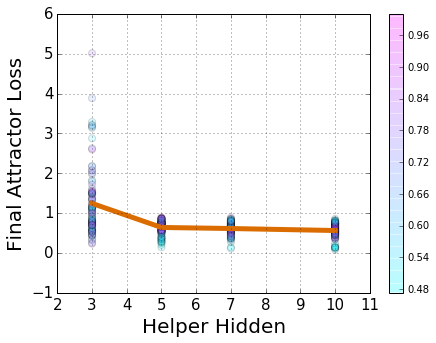

In [123]:
path = '/Users/denis/Dropbox/school/research/attractor_net_notebooks/experiments/results/parity_length(h_hid_test).txt'
test_results = read_in_results_log(path, 'TEST:')
entropy_results = read_in_results_log(path, 'ENTROPY:')
att_loss_results = read_in_results_log(path, 'ATT_LOSS:')
h_hid = [3, 5, 7, 10]

plot_x_vs_variance(h_hid, test_results, test_results, xlabel=r"Helper Hidden", ylabel=r"Accuracy")
plot_x_vs_variance(h_hid, entropy_results, test_results, r"Helper Hidden", r"Final Entropy")
plot_x_vs_variance(h_hid, att_loss_results, test_results, r"Helper Hidden", r"Final Attractor Loss")